# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv("train.csv", index_col=0)
test = pd.read_csv("test.csv", index_col=0)

In [4]:
train.shape

(103904, 24)

In [5]:
test.shape

(25976, 24)

In [6]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [8]:
train.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [9]:
train.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

### As you see, we have 310 missing data in Arrival Delay in minutes in train data, and they are float value

In [10]:
test.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [11]:
test.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

### Also as you see, we have 83 missing data in Arrival Delay in minutes in test data, and they are float value

In [12]:
train.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [13]:
test.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [14]:
train['Arrival Delay in Minutes'].fillna(train['Arrival Delay in Minutes'].mean(), inplace=True)

In [15]:
test['Arrival Delay in Minutes'].fillna(test['Arrival Delay in Minutes'].mean(), inplace=True)

### We fill the not available values with mean of this column

In [16]:
train = pd.get_dummies(train, drop_first=True)

In [17]:
test = pd.get_dummies(test, drop_first=True)

### We convert objects to int

### We delete meaningless column:

In [18]:
train.drop(['id'], axis=1, inplace=True)

In [19]:
test.drop(['id'], axis=1, inplace=True)

In [20]:
train

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,True,False,True,False,True,False
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,True,True,False,False,False,False
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,False,False,False,False,False,True
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,False,False,False,False,False,False
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,False,True,False,True,False,False
103900,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,True,False,False,False,False,True
103901,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,True,True,False,False,False,False
103902,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,False,True,False,True,False,False


In [21]:
test

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,52,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,False,False,False,True,False,True
1,36,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,False,False,False,False,False,True
2,20,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,True,True,False,True,False,False
3,44,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,True,False,False,False,False,True
4,49,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,True,True,False,False,False,False
25972,23,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,True,False,False,False,False,True
25973,17,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,False,False,True,True,False,False
25974,14,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,True,False,False,False,False,True


In [22]:
train.dtypes

Age                                    int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Gender_Male                             bool
Customer Type_disloyal Customer         bool
Type of Travel_Personal Travel          bool
Class_Eco                               bool
Class_Eco 

In [23]:
train['satisfaction_satisfied'].value_counts()

satisfaction_satisfied
False    58879
True     45025
Name: count, dtype: int64

In [24]:
test['satisfaction_satisfied'].value_counts()

satisfaction_satisfied
False    14573
True     11403
Name: count, dtype: int64

## Plotting the to see corralation

In [25]:
plt.figure(figsize=(8,8))
train_corr = train.corr()
# Set the precision for the float numbers using float_format
# train_corr = train_corr.applymap('{:.2f}'.format)
train_corr_style = train_corr.style.background_gradient(cmap='coolwarm')
train_corr_style

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
Age,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012127,0.008928,-0.281674,-0.048524,-0.132551,-0.013376,0.137167
Flight Distance,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002423,0.005828,-0.225200,-0.267344,-0.404493,-0.123674,0.298780
Inflight wifi service,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019067,0.008974,-0.007543,-0.105085,-0.037197,0.008034,0.284245
Departure/Arrival time convenient,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000863,0.009142,-0.206869,0.259763,0.082321,0.028740,-0.051601
Ease of Online booking,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007972,0.006951,-0.019509,-0.133511,-0.098039,-0.018914,0.171705
Gate location,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005136,0.000333,0.006078,-0.030700,-0.003488,-0.002031,0.000682
Food and drink,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032472,0.005772,-0.059454,-0.063439,-0.078801,-0.016671,0.209936
Online boarding,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.021915,-0.042260,-0.189262,-0.224803,-0.293103,-0.074608,0.503557
Seat comfort,0.160277,0.157333,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,0.610590,0.131971,0.105559,0.074542,0.191854,0.069218,0.678534,-0.027898,-0.029851,-0.026502,-0.159484,-0.124399,-0.206054,-0.054034,0.349459
Inflight entertainment,0.076444,0.128740,0.209321,-0.004861,0.047032,0.003517,0.622512,0.285066,0.610590,1.000000,0.420153,0.299692,0.378210,0.120867,0.404855,0.691815,-0.027489,-0.030658,0.006117,-0.109930,-0.148199,-0.176323,-0.045271,0.398059


<Figure size 800x800 with 0 Axes>

In [26]:
plt.figure(figsize=(8,8))
test_corr = test.corr()
# Set the precision for the float numbers using float_format
# test_corr = test_corr.applymap('{:.2f}'.format)
test_corr_style = test_corr.style.background_gradient(cmap='coolwarm')
test_corr_style

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
Age,1.000000,0.099409,0.009242,0.032449,0.013565,0.003308,0.023841,0.202058,0.154507,0.068998,0.054977,0.033299,-0.049863,0.025388,-0.059083,0.048418,-0.004334,-0.007387,0.009261,-0.294210,-0.029773,-0.132680,-0.011211,0.121697
Flight Distance,0.099409,1.000000,0.005007,-0.014401,0.062989,0.008410,0.057322,0.214629,0.158957,0.137538,0.117880,0.136995,0.071549,0.075720,0.066355,0.105578,0.003446,0.000130,-0.005222,-0.229306,-0.264559,-0.401418,-0.126301,0.295292
Inflight wifi service,0.009242,0.005007,1.000000,0.349137,0.710684,0.347790,0.122306,0.459366,0.116991,0.201782,0.113658,0.159699,0.118199,0.046046,0.108419,0.125768,-0.010078,-0.012251,-0.006323,0.001333,-0.109021,-0.037123,-0.003235,0.280395
Departure/Arrival time convenient,0.032449,-0.014401,0.349137,1.000000,0.440230,0.458439,-0.016006,0.080937,-0.001926,-0.022326,0.060982,0.003373,0.065684,0.082461,0.067804,-0.007670,-0.000238,-0.001343,0.008417,-0.206864,0.246425,0.069698,0.024609,-0.064798
Ease of Online booking,0.013565,0.062989,0.710684,0.440230,1.000000,0.465514,0.025141,0.408003,0.022811,0.044715,0.039988,0.116754,0.040685,-0.000108,0.035769,0.010974,-0.001062,-0.003155,0.001703,-0.012340,-0.136350,-0.103471,-0.018940,0.157709
Gate location,0.003308,0.008410,0.347790,0.458439,0.465514,1.000000,-0.009694,0.006993,-0.000721,-0.000340,-0.031606,-0.002428,-0.004395,-0.054954,-0.005129,-0.014195,0.008039,0.007760,-0.005628,-0.001940,-0.026540,-0.011970,-0.001159,-0.016627
Food and drink,0.023841,0.057322,0.122306,-0.016006,0.025141,-0.009694,1.000000,0.229601,0.580970,0.627265,0.050688,0.035870,0.037617,0.076775,0.039992,0.659253,-0.025957,-0.028272,-0.014422,-0.047269,-0.091164,-0.085888,-0.032384,0.216868
Online boarding,0.202058,0.214629,0.459366,0.080937,0.408003,0.006993,0.229601,1.000000,0.415414,0.279391,0.149430,0.120354,0.084583,0.203309,0.071972,0.320912,-0.021037,-0.025833,-0.056031,-0.188418,-0.220843,-0.290864,-0.081321,0.494526
Seat comfort,0.154507,0.158957,0.116991,-0.001926,0.022811,-0.000721,0.580970,0.415414,1.000000,0.616817,0.124805,0.099150,0.074927,0.182469,0.067306,0.683924,-0.028341,-0.032981,-0.047765,-0.143362,-0.140981,-0.200439,-0.073081,0.346275
Inflight entertainment,0.068998,0.137538,0.201782,-0.022326,0.044715,-0.000340,0.627265,0.279391,0.616817,1.000000,0.412266,0.303203,0.382782,0.114343,0.411018,0.695269,-0.025085,-0.028276,-0.005217,-0.090418,-0.171904,-0.179378,-0.067537,0.398951


<Figure size 800x800 with 0 Axes>

In [27]:
train.drop('Departure Delay in Minutes', axis=1, inplace=True)
test.drop('Departure Delay in Minutes', axis=1, inplace=True)

### Drop Outliers

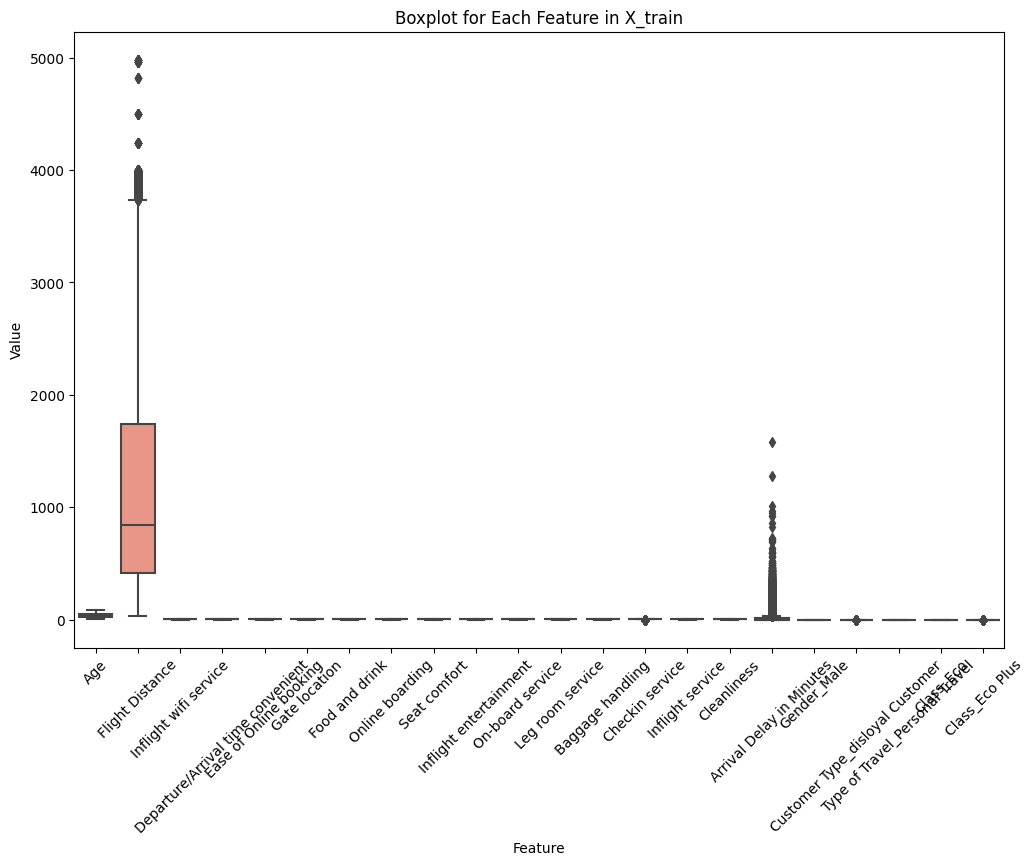

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have X_train and y_train already defined
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

# Convert X_train to a DataFrame
X_train_df = pd.DataFrame(X_train)

# Plot boxplot for each column in X_train
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_train_df)
plt.title('Boxplot for Each Feature in X_train')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()

### We will remove some values which has outliers:
### Flight Distance

<Axes: xlabel='Flight Distance'>

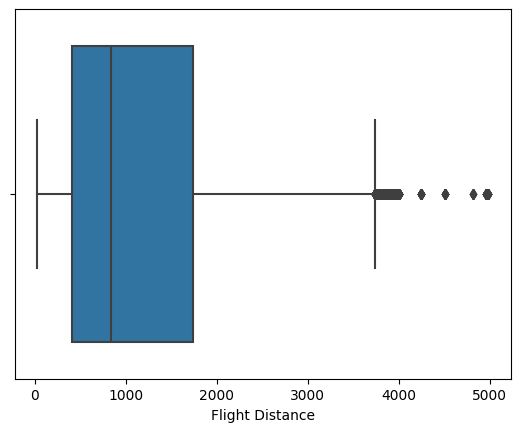

In [29]:
sns.boxplot(x=X_train['Flight Distance'])

Old Shape:  (103904, 22)
New Shape:  (101613, 22)


<Axes: xlabel='Flight Distance'>

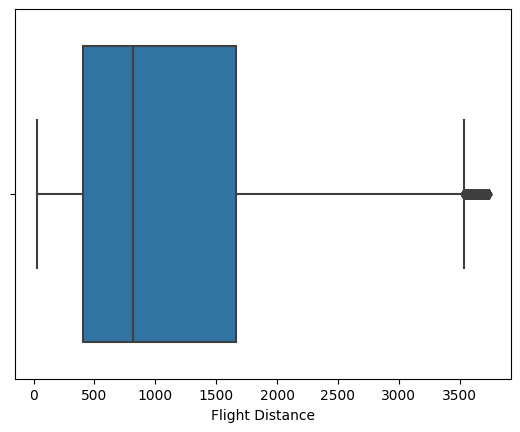

In [30]:
# Quantiles:
Q1 = np.quantile(X_train['Flight Distance'], 0.25, interpolation='linear')
Q3 = np.quantile(X_train['Flight Distance'], 0.75, interpolation='linear')

IQR = Q3 - Q1

print("Old Shape: ", X_train.shape)
 
# upper:
upper1 = np.where(X_train['Flight Distance'] >= (Q3 + 1.5*IQR))

# lower
lower1 = np.where(X_train['Flight Distance'] <= (Q1 - 1.5*IQR))

# Removing the outliers
X_train.drop(upper1[0], inplace=True)
X_train.drop(lower1[0], inplace=True)

# New Shape
print("New Shape: ", X_train.shape)
sns.boxplot(x=X_train['Flight Distance'])

### Arrival delay in minutes

<Axes: >

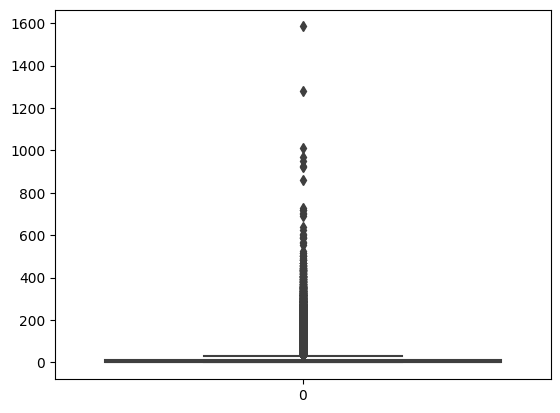

In [31]:
sns.boxplot(X_train['Arrival Delay in Minutes'])

Old Shape:  (101613, 22)
New Shape:  (87969, 22)


<Axes: xlabel='Arrival Delay in Minutes'>

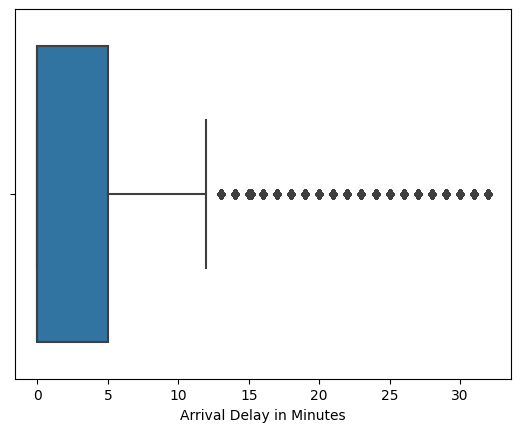

In [32]:
# Now proceed with calculating quantiles, removing outliers, and plotting the boxplot
# Quantiles:
Q1 = np.quantile(X_train['Arrival Delay in Minutes'], 0.25, interpolation='midpoint')
Q3 = np.quantile(X_train['Arrival Delay in Minutes'], 0.75, interpolation='midpoint')

IQR = Q3 - Q1

print("Old Shape: ", X_train.shape)

# Removing the outliers
# upper:
X_train = X_train[X_train['Arrival Delay in Minutes'] < (Q3 + 1.5*IQR)]

# lower
X_train = X_train[X_train['Arrival Delay in Minutes'] > (Q1 - 1.5*IQR)]


# New Shape
print("New Shape: ", X_train.shape)
sns.boxplot(x=X_train['Arrival Delay in Minutes'])

### Baggage handling

<Axes: xlabel='Baggage handling'>

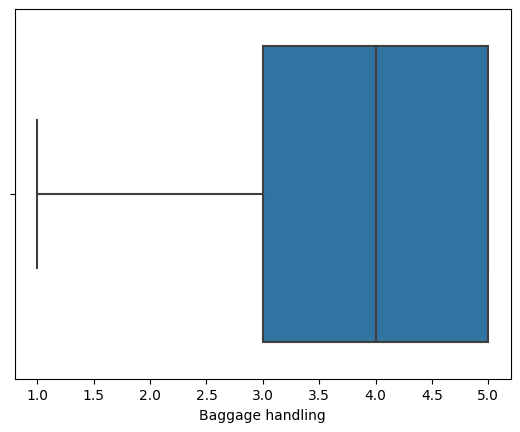

In [33]:
sns.boxplot(x=X_train['Baggage handling'])

Old Shape:  (87969, 22)
New Shape:  (87969, 22)


<Axes: xlabel='Baggage handling'>

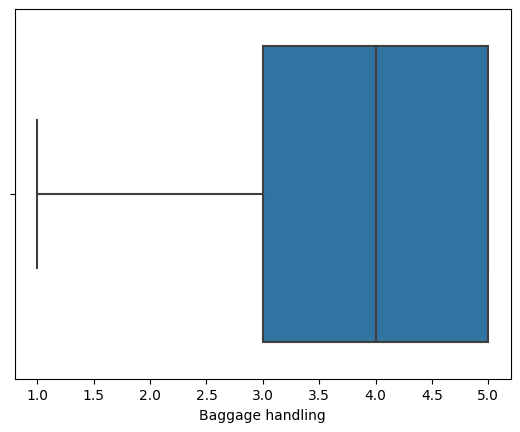

In [34]:
# Now proceed with calculating quantiles, removing outliers, and plotting the boxplot
# Quantiles:
Q1 = np.quantile(X_train['Baggage handling'], 0.25, interpolation='midpoint')
Q3 = np.quantile(X_train['Baggage handling'], 0.75, interpolation='midpoint')

IQR = Q3 - Q1

print("Old Shape: ", X_train.shape)

# Removing the outliers
# upper:
X_train = X_train[X_train['Baggage handling'] < (Q3 + 1.5*IQR)]

# lower
X_train = X_train[X_train['Baggage handling'] > (Q1 - 1.5*IQR)]


# New Shape
print("New Shape: ", X_train.shape)
sns.boxplot(x=X_train['Baggage handling'])

## Train-Test Split

In [35]:
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

In [36]:
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

## Standard Scaling

In [37]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [38]:
X_train.max()

40.60020600867102

In [39]:
X_test.min()

-3.096503943690634

# Modeling

### Logistic Regression

In [40]:
# To maintain the old behavior, you can specify the argument as follows:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

In [41]:
print("Accuracy: ", metrics.accuracy_score(y_test, lr_pred))

Accuracy:  0.8713812750230983


In [42]:
print("F1 Score: ", metrics.f1_score(y_test, lr_pred))

F1 Score:  0.8503605500067183


### Random Forest

In [43]:
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [44]:
print("Accuracy: ", metrics.accuracy_score(y_test, rfc_pred))

Accuracy:  0.9621188789651987


In [45]:
print("F1 Score: ", metrics.f1_score(y_test, rfc_pred))

F1 Score:  0.9561575476742113


### Decision Tree

In [46]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

In [47]:
print("Accuracy: ", metrics.accuracy_score(y_test, dtc_pred))

Accuracy:  0.946181090237142


In [48]:
print("F1 Score: ", metrics.accuracy_score(y_test, dtc_pred))

F1 Score:  0.946181090237142


# Hyperparameter Optimization

### Random Forest

In [49]:
rf = RandomForestClassifier(random_state=42)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [50]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=50, stop=200, num=4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}
print(random_grid)

{'n_estimators': [50, 100, 150, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [51]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search with X_train data
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, verbose=2)

In [52]:
rf_random.best_params_

{'n_estimators': 150,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

In [53]:
def evaluate(model, test_features):
    predictions = model.predict(test_features)
    accuracy = metrics.fbeta_score(y_test, predictions, average=None, beta=0.5).mean()
    return accuracy

base_model = RandomForestClassifier(n_estimators=10, random_state=42)
base_model.fit(X_train, y_train)

base_accuracy = evaluate(base_model, X_test)
rf_best = rf_random.best_estimator_
random_accuracy = evaluate(rf_best, X_test)
print('Improvement of {:0.2f}%.'.format(100*(random_accuracy - base_accuracy)/base_accuracy))

Improvement of 0.59%.
